In [1]:
from pathlib import Path

import pandas as pd

from plate import Plate, QCPlate, SamplePlate
from study import Study

In [2]:
p = Plate(12)
print(p)

[    INFO] --- Created a 3x4 plate with 12 wells.


Plate ID: 1
Dimensions: 3 rows x 4 columns
Plate Layout (Well Names):
[['A1' 'A2' 'A3' 'A4']
 ['B1' 'B2' 'B3' 'B4']
 ['C1' 'C2' 'C3' 'C4']]


In [3]:
ps = SamplePlate()
ps.as_dataframe()

[    INFO] --- Created a 8x12 plate with 96 wells.


name  plate_id coordinate  index  empty  rgb_color sample_code sample_name
0    A1         1     (0, 0)      0   True  (1, 1, 1)           S    Specimen
1    A2         1     (0, 1)      1   True  (1, 1, 1)           S    Specimen
2    A3         1     (0, 2)      2   True  (1, 1, 1)           S    Specimen
3    A4         1     (0, 3)      3   True  (1, 1, 1)           S    Specimen
4    A5         1     (0, 4)      4   True  (1, 1, 1)           S    Specimen
..  ...       ...        ...    ...    ...        ...         ...         ...
91   H8         1     (7, 7)     91   True  (1, 1, 1)           S    Specimen
92   H9         1     (7, 8)     92   True  (1, 1, 1)           S    Specimen
93  H10         1     (7, 9)     93   True  (1, 1, 1)           S    Specimen
94  H11         1    (7, 10)     94   True  (1, 1, 1)           S    Specimen
95  H12         1    (7, 11)     95   True  (1, 1, 1)           S    Specimen

[96 rows x 8 columns]

In [4]:
qc_sample_pattern = Path("../../data/plate_config_dynamic.toml")
qcp = QCPlate(QC_config=qc_sample_pattern)
qcp.as_dataframe()

[    INFO] --- Created a 8x12 plate with 96 wells.
[    INFO] --- Successfully loaded config file ../../data/plate_config_dynamic.toml
[    INFO] --- Creating dynamic plate layout with QC samples.


name  plate_id coordinate  index  empty  rgb_color     QC sample_code  \
0    A1         1     (0, 0)      0   True  (1, 1, 1)   True          EC   
1    A2         1     (0, 1)      1   True  (1, 1, 1)   True          PB   
2    A3         1     (0, 2)      2   True  (1, 1, 1)  False           S   
3    A4         1     (0, 3)      3   True  (1, 1, 1)  False           S   
4    A5         1     (0, 4)      4   True  (1, 1, 1)  False           S   
..  ...       ...        ...    ...    ...        ...    ...         ...   
91   H8         1     (7, 7)     91   True  (1, 1, 1)   True          EC   
92   H9         1     (7, 8)     92   True  (1, 1, 1)   True          PO   
93  H10         1     (7, 9)     93   True  (1, 1, 1)  False           S   
94  H11         1    (7, 10)     94   True  (1, 1, 1)  False           S   
95  H12         1    (7, 11)     95   True  (1, 1, 1)  False           S   

                      sample_type sample_name  
0   EC: External_Control_(matrix)         EC1  
1                 PB: Paper_Blank         PB1  
2                        Specimen          S1  
3                        Specimen          S2  
4                        Specimen          S3  
..                            ...         ...  
91  EC: External_Control_(matrix)         EC8  
92           PO: Pooled_specimens         PO4  
93                       Specimen          S1  
94                       Specimen          S2  
95                       Specimen          S3  

[96 rows x 10 columns]

In [5]:
fake_samples_csv_file = Path("../../data/fake_case_control_Npairs_523_Ngroups_5.csv")

samples_df = pd.read_csv(fake_samples_csv_file)

samples_df

Unnamed: 0  pair_ID  specimen_ID   object date_of_birth   barcode  \
0              0        0          888  Control    1993-12-13  95388762   
1              1        0          889     Case    1993-12-13  66794295   
2              2        1          962  Control    2006-06-22  69215322   
3              3        1          963     Case    2006-06-22  77642424   
4              4        2          261  Control    1999-05-06  30225664   
...          ...      ...          ...      ...           ...       ...   
1041        1041      520           66     Case    1991-08-29    772655   
1042        1042      521          558  Control    1993-03-21  49757491   
1043        1043      521          559     Case    1993-03-24  46022059   
1044        1044      522          710  Control    2002-03-23  73437017   
1045        1045      522          711     Case    2002-03-29  43710652   

               organ  
0     Parotid glands  
1     Parotid glands  
2            Tendons  
3            Tendons  
4     Parotid glands  
...              ...  
1041  Mammary glands  
1042  Parotid glands  
1043  Parotid glands  
1044  Mammary glands  
1045  Mammary glands  

[1046 rows x 7 columns]

In [6]:
study = Study("fake_study")
study.load_sample_file(fake_samples_csv_file)
# df = study.specimen_records_df
# df = df.sort_values(by=["organ"])
# study.specimen_records_df = df
# df

[    INFO] --- Found group index in column pair_ID
[    INFO] --- Metadata in file:
[    INFO] --- 	Unnamed: 0
[    INFO] --- 	pair_ID
[    INFO] --- 	specimen_ID
[    INFO] --- 	object
[    INFO] --- 	date_of_birth
[    INFO] --- 	barcode
[    INFO] --- 	organ


In [7]:

study.randomize_order(case_control=True, reproducible=False)
study.distribute_samples_to_plates(SamplePlate())


[    INFO] --- Randomly permuting group order (samples within group unchanged) using variable 'pair_ID'
[    INFO] --- Using a fixed seed to random number generator for reproducibility;                 running this method will always give the same result.
[    INFO] --- Created a 8x12 plate with 96 wells.
[    INFO] --- Distributed samples across 11 plates.


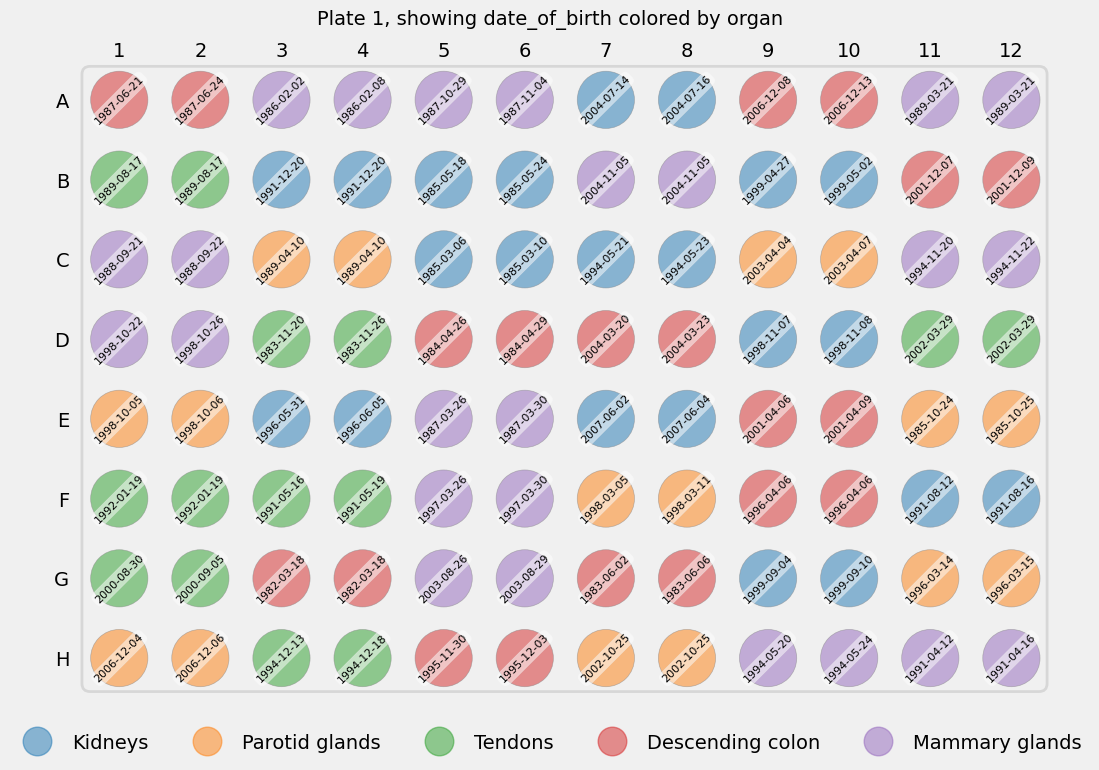

In [8]:
fig = study[0].as_figure(
    color_metadata_key="organ",
    annotation_metadata_key="date_of_birth",
    rotation=45,
    well_size=1700,
    plt_style="fivethirtyeight",
    colormap="tab10",
    alpha=0.5,
    show_grid=False,
    legend_bb=(0.15, -0.1, 0.7, 1.5),
)

In [9]:
study.get_attribute_plate_distributions(attribute="organ")

{1: organ
 Mammary glands      0.250000
 Kidneys             0.229167
 Descending colon    0.208333
 Parotid glands      0.166667
 Tendons             0.145833
 Name: proportion, dtype: float64,
 2: organ
 Tendons             0.250000
 Kidneys             0.208333
 Descending colon    0.208333
 Mammary glands      0.166667
 Parotid glands      0.166667
 Name: proportion, dtype: float64,
 3: organ
 Tendons             0.229167
 Descending colon    0.229167
 Mammary glands      0.208333
 Parotid glands      0.208333
 Kidneys             0.125000
 Name: proportion, dtype: float64,
 4: organ
 Parotid glands      0.333333
 Tendons             0.208333
 Descending colon    0.187500
 Kidneys             0.166667
 Mammary glands      0.104167
 Name: proportion, dtype: float64,
 5: organ
 Mammary glands      0.312500
 Tendons             0.250000
 Kidneys             0.187500
 Parotid glands      0.166667
 Descending colon    0.083333
 Name: proportion, dtype: float64,
 6: organ
 Mammary glands

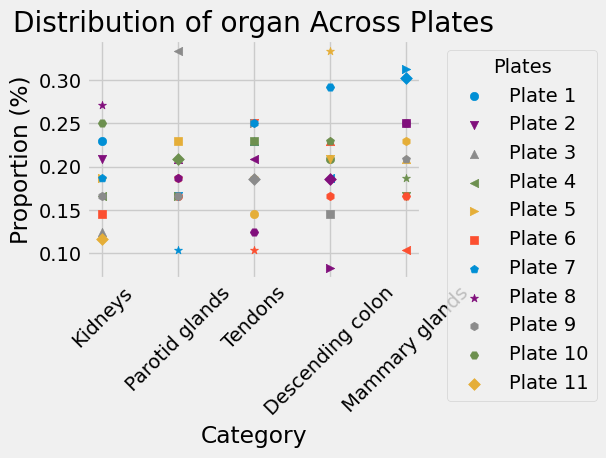

In [10]:
import matplotlib.pyplot as plt

def plot_barchart(distributions, attribute):
    # Create a figure and axis
    fig, ax = plt.subplots()

    # Extract unique plates and categories
    plates = distributions.keys()
    categories = set(cat for dist in distributions.values() for cat in dist.index)

    # Assign a unique marker to each plate
    markers = ['o', 'v', '^', '<', '>', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X']
    if len(plates) > len(markers):
        raise ValueError("Not enough markers for the number of plates")

    # Plot each plate's distribution
    for plate, marker in zip(plates, markers):
        for category in categories:
            proportion = distributions[plate].get(category, 0)
            ax.scatter(category, proportion, label=f'Plate {plate}' if category == list(categories)[0] else "", marker=marker)

    # Add legend, title, and labels
    ax.legend(title="Plates", bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.set_title(f'Distribution of {attribute} Across Plates')
    ax.set_xlabel('Category')
    ax.set_ylabel('Proportion (%)')
    ax.grid(True)

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Assuming 'distributions' is the output from your get_attribute_plate_distributions method
distributions = study.get_attribute_plate_distributions("organ")
plot_barchart(distributions, "organ")


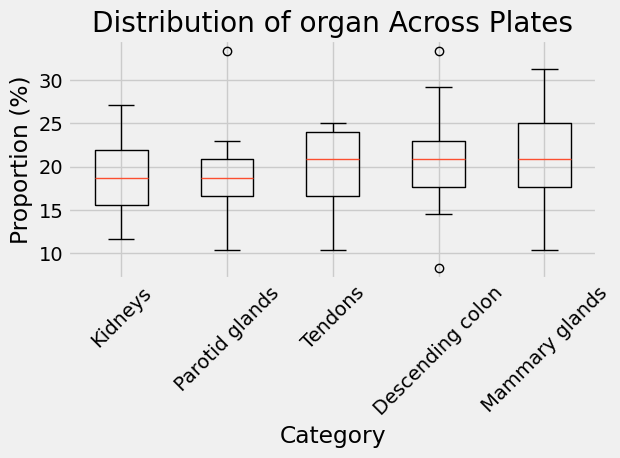

In [11]:
import matplotlib.pyplot as plt

def plot_boxplot(distributions, attribute):
    # Create a figure and axis
    fig, ax = plt.subplots()

    # Extract unique categories and their distributions across plates
    categories = set(cat for dist in distributions.values() for cat in dist.index)
    category_distributions = {cat: [] for cat in categories}

    # Collect distributions for each category across plates
    for plate_distribution in distributions.values():
        for category in categories:
            proportion = plate_distribution.get(category, 0) * 100
            category_distributions[category].append(proportion)

    # Prepare data for box plot
    data = [category_distributions[cat] for cat in categories]
    
    # Create box plot
    ax.boxplot(data, labels=categories)

    # Add title and labels
    ax.set_title(f'Distribution of {attribute} Across Plates')
    ax.set_xlabel('Category')
    ax.set_ylabel('Proportion (%)')
    ax.grid(True)

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Assuming 'distributions' is the output from your get_attribute_plate_distributions method
distributions = study.get_attribute_plate_distributions("organ")
plot_boxplot(distributions, "organ")


In [12]:
study.specimen_records_df["organ"].value_counts(normalize=False)

organ
Mammary glands      226
Descending colon    216
Tendons             206
Parotid glands      202
Kidneys             196
Name: count, dtype: int64

In [13]:
study[3].as_dataframe()["organ"].value_counts(normalize=True)

organ
Parotid glands      0.333333
Tendons             0.208333
Descending colon    0.187500
Kidneys             0.166667
Mammary glands      0.104167
Name: proportion, dtype: float64

In [14]:
study_with_qc = Study("fake_study")
study_with_qc.load_sample_file(fake_samples_csv_file)

[    INFO] --- Found group index in column pair_ID
[    INFO] --- Metadata in file:
[    INFO] --- 	Unnamed: 0
[    INFO] --- 	pair_ID
[    INFO] --- 	specimen_ID
[    INFO] --- 	object
[    INFO] --- 	date_of_birth
[    INFO] --- 	barcode
[    INFO] --- 	organ


In [15]:
qc_sample_pattern = Path("../../data/plate_config_dynamic.toml")
qc_plate = QCPlate(QC_config=qc_sample_pattern)

study_with_qc.distribute_samples_to_plates(qc_plate)

[    INFO] --- Created a 8x12 plate with 96 wells.
[    INFO] --- Successfully loaded config file ../../data/plate_config_dynamic.toml
[    INFO] --- Creating dynamic plate layout with QC samples.
[    INFO] --- Distributed samples across 14 plates.


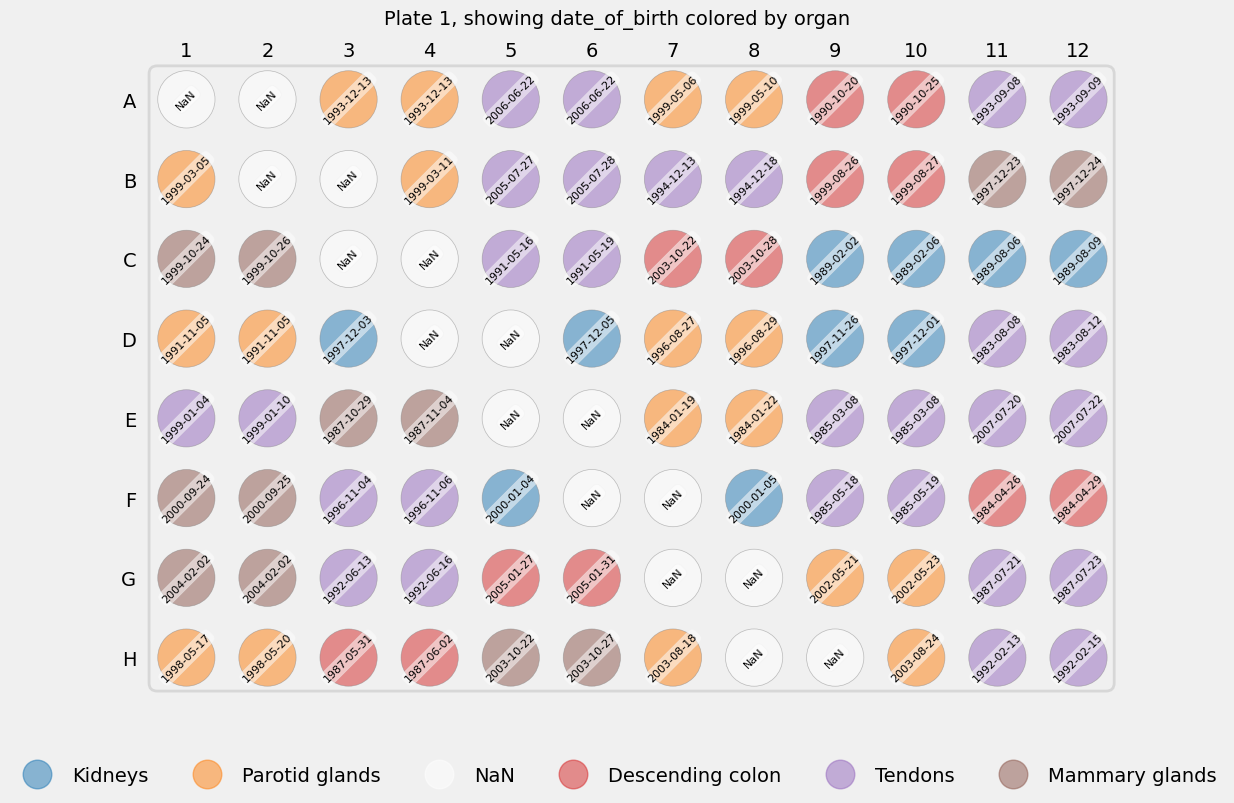

In [16]:
fig = study_with_qc[0].as_figure(
    color_metadata_key="organ",
    annotation_metadata_key="date_of_birth",
    rotation=45, well_size=1700,
    colormap="tab10",
    show_grid=False,
    alpha=0.5
    )

## Plate with QC samples

In [17]:
s = Study()
s.load_sample_file(fake_samples_csv_file)

[    INFO] --- Found group index in column pair_ID
[    INFO] --- Metadata in file:
[    INFO] --- 	Unnamed: 0
[    INFO] --- 	pair_ID
[    INFO] --- 	specimen_ID
[    INFO] --- 	object
[    INFO] --- 	date_of_birth
[    INFO] --- 	barcode
[    INFO] --- 	organ


In [18]:
s[1]

IndexError: list index out of range